# **Reinforcement Learning and Dynamic Optimization.**

**Technical University of Crete**

Assignment 2 (2024) - Day Trading in the Stock Market

Student: Karalis Asterinos

AM: 2020030107

# **Brief code description**

#### 'Eta' Parameter Calculation:
- Parameter 'eta' is initialy calculated according to the formula sqrt(ln(K)/T) where K is the number of stocks and T is the number of days.

#### Multiplicative Weights without Fees
-   Initially, each stock is given equal weight, and these weights are used to determine the probabilities of selecting each stock daily. After choosing a stock based on these probabilities, the reward (percentage change in stock value) is observed, and the weight of the chosen stock is updated exponentially based on the reward.

#### Multiplicative Weights with Fees
- We have the same initial setup of weights and probability-based stock selection is used. However, the reward for the chosen stock is adjusted by subtracting the transaction fee associated with that stock. The weights are updated based on this adjusted reward. Additionally, the best possible reward each day also considers transaction fees.

#### Multiplicative Weights Bandits with Fees
- The initial setup remains the same, with equal weights and probability-based selection. The reward is adjusted for transaction fees as in Task 2. However, to simulate the bandit scenario, the weights are reset after each day, preventing the algorithm from converging prematurely and adapting to the uncertainty and limited information.


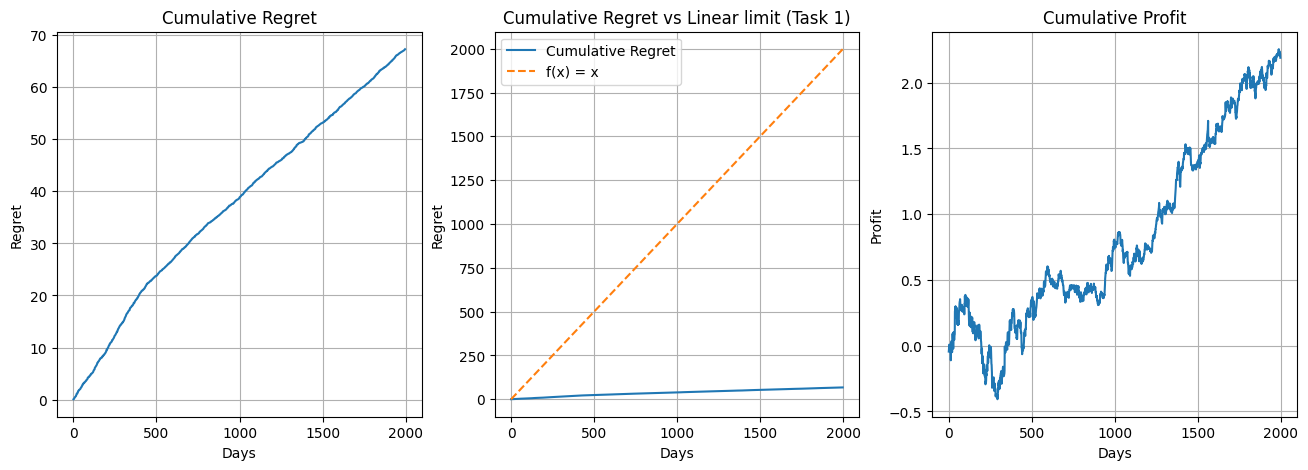

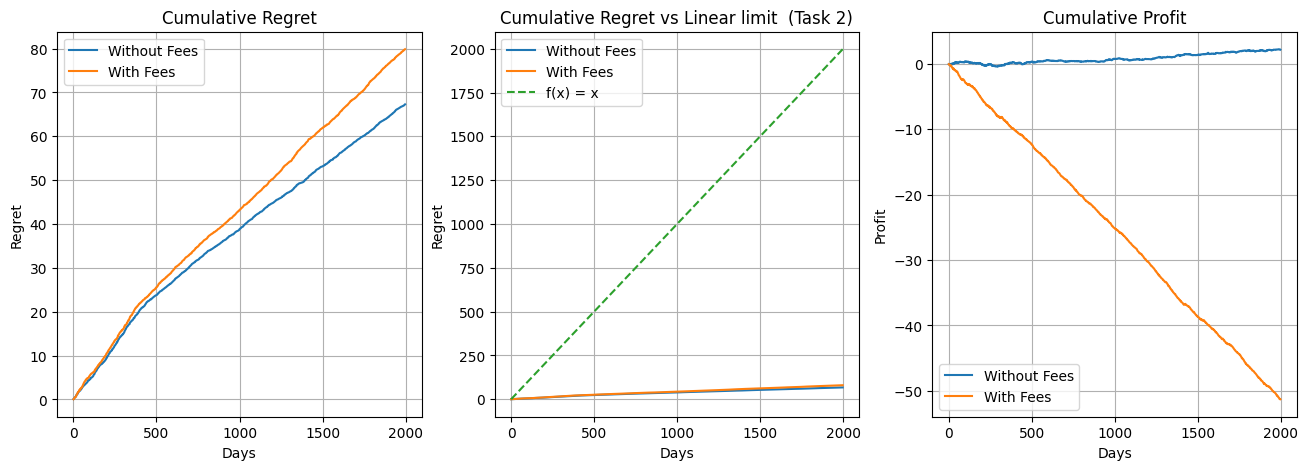

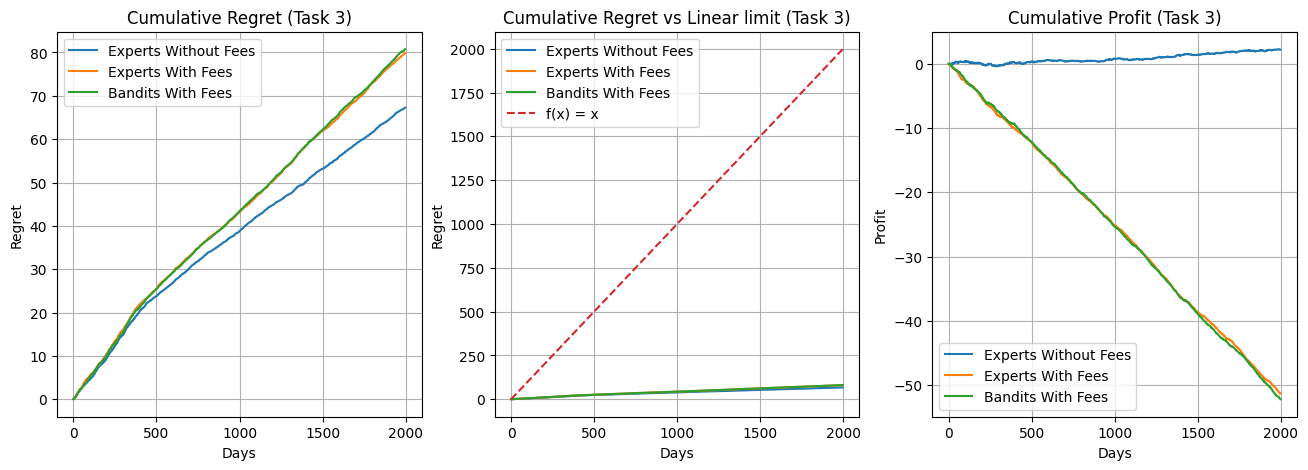

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

# Load the data
data = pd.read_csv('stocks.csv')

# Get the number of stocks (K) and days (T)
K = data.shape[1]
T = data.shape[0]

# optimal eta according to the formula
optimal_eta = math.sqrt(math.log(K)/T)
# actual value 0.03394768020776252

def multiplicative_weights(data, eta=optimal_eta):
    # Initialize the number of stocks and days from the data
    K, T = data.shape[1], data.shape[0]

    # Initialize weights equally for each stock
    weights = np.ones(K)

    # Arrays to store cumulative regret and profit
    cumulative_regret = np.zeros(T)
    cumulative_profit = np.zeros(T)

    for t in range(T):
        # Calculate probabilities for selecting each stock
        probabilities = weights / np.sum(weights)

        # Choose a stock based on the calculated probabilities
        chosen_stock = np.random.choice(K, p=probabilities)

        # Calculate the reward for the chosen stock
        reward = data.iloc[t, chosen_stock]

        # Update the weights for the chosen stock
        weights[chosen_stock] *= np.exp(eta * reward)

        # Calculate the best possible reward for that day
        best_possible = np.max(data.iloc[t])

        # Update cumulative regret
        cumulative_regret[t] = cumulative_regret[t - 1] + (best_possible - reward) if t > 0 else (best_possible - reward)

        # Update cumulative profit
        cumulative_profit[t] = cumulative_profit[t - 1] + reward if t > 0 else reward

    return cumulative_regret, cumulative_profit

# Run the Multiplicative Weights algorithm without transaction fees
cumulative_regret, cumulative_profit = multiplicative_weights(data)

# Plot the cumulative regret and profit for Task 1
plt.figure(figsize=(16, 5))
plt.subplot(1, 3, 1)
plt.plot(cumulative_regret)
plt.title('Cumulative Regret')
plt.xlabel('Days')
plt.ylabel('Regret')
plt.grid(True)

plt.subplot(1, 3, 2)
plt.plot(cumulative_regret, label='Cumulative Regret')
plt.plot(np.arange(T), np.arange(T), label='f(x) = x', linestyle='--')
plt.title('Cumulative Regret vs Linear limit (Task 1)')
plt.xlabel('Days')
plt.ylabel('Regret')
plt.grid(True)
plt.legend()


plt.subplot(1, 3, 3)
plt.plot(cumulative_profit)
plt.title('Cumulative Profit')
plt.xlabel('Days')
plt.ylabel('Profit')
plt.grid(True)

plt.show()

def multiplicative_weights_with_fees(data, fees, eta=optimal_eta):
    # Initialize the number of stocks and days from the data
    K, T = data.shape[1], data.shape[0]

    # Initialize weights equally for each stock
    weights = np.ones(K)

    # Arrays to store cumulative regret and profit
    cumulative_regret = np.zeros(T)
    cumulative_profit = np.zeros(T)

    for t in range(T):
        # Calculate probabilities for selecting each stock
        probabilities = weights / np.sum(weights)

        # Choose a stock based on the calculated probabilities
        chosen_stock = np.random.choice(K, p=probabilities)

        # Calculate the reward for the chosen stock after subtracting transaction fees
        reward = (data.iloc[t, chosen_stock] - fees[chosen_stock])

        # Update the weights for the chosen stock
        weights[chosen_stock] *= np.exp(eta * reward)

        # Calculate the best possible reward for that day considering transaction fees
        best_possible = np.max((data.iloc[t] - fees))

        # Update cumulative regret
        cumulative_regret[t] = cumulative_regret[t - 1] + (best_possible - reward) if t > 0 else (best_possible - reward)

        # Update cumulative profit
        cumulative_profit[t] = cumulative_profit[t - 1] + reward if t > 0 else reward

    return cumulative_regret, cumulative_profit

# Define transaction fees as a linear range from 0.5% to 5% with 0.05% step
fees = np.linspace(0.005, 0.05, K)

# Run the Multiplicative Weights algorithm with transaction fees
cumulative_regret_fees, cumulative_profit_fees = multiplicative_weights_with_fees(data, fees)

# Plot the cumulative regret and profit for Task 2
plt.figure(figsize=(16, 5))
plt.subplot(1, 3, 1)
plt.plot(cumulative_regret, label='Without Fees')
plt.plot(cumulative_regret_fees, label='With Fees')
plt.title('Cumulative Regret')
plt.xlabel('Days')
plt.ylabel('Regret')
plt.grid(True)
plt.legend()

plt.subplot(1, 3, 2)
plt.plot(cumulative_regret, label='Without Fees')
plt.plot(cumulative_regret_fees, label='With Fees')
plt.plot(np.arange(T), np.arange(T), label='f(x) = x', linestyle='--')
plt.title('Cumulative Regret vs Linear limit  (Task 2)')
plt.xlabel('Days')
plt.ylabel('Regret')
plt.grid(True)
plt.legend()

plt.subplot(1, 3, 3)
plt.plot(cumulative_profit, label='Without Fees')
plt.plot(cumulative_profit_fees, label='With Fees')
plt.title('Cumulative Profit')
plt.xlabel('Days')
plt.ylabel('Profit')
plt.grid(True)
plt.legend()

plt.show()

def multiplicative_weights_bandit_with_fees(data, fees, eta=optimal_eta):
    # Initialize the number of stocks and days from the data
    K, T = data.shape[1], data.shape[0]

    # Initialize weights equally for each stock
    weights = np.ones(K)

    # Arrays to store cumulative regret and profit
    cumulative_regret = np.zeros(T)
    cumulative_profit = np.zeros(T)

    for t in range(T):
        # Calculate probabilities for selecting each stock
        probabilities = weights / np.sum(weights)

        # Choose a stock based on the calculated probabilities
        chosen_stock = np.random.choice(K, p=probabilities)

        # Calculate the reward for the chosen stock after subtracting transaction fees
        reward = (data.iloc[t, chosen_stock] - fees[chosen_stock])

        # Update the weights for the chosen stock
        weights[chosen_stock] *= np.exp(eta * reward)

        # Calculate the best possible reward for that day considering transaction fees
        best_possible = np.max((data.iloc[t] - fees))

        # Update cumulative regret
        cumulative_regret[t] = cumulative_regret[t - 1] + (best_possible - reward) if t > 0 else (best_possible - reward)

        # Update cumulative profit
        cumulative_profit[t] = cumulative_profit[t - 1] + reward if t > 0 else reward

        # Reset weights to avoid premature convergence, simulating a bandit setting
        weights = np.ones(K)

    return cumulative_regret, cumulative_profit

# Run the bandit version of the algorithm with transaction fees
cumulative_regret_bandit_fees, cumulative_profit_bandit_fees = multiplicative_weights_bandit_with_fees(data, fees)

# Plot the cumulative regret and profit for Task 3
plt.figure(figsize=(16, 5))
plt.subplot(1, 3, 1)
plt.plot(cumulative_regret, label='Experts Without Fees')
plt.plot(cumulative_regret_fees, label='Experts With Fees')
plt.plot(cumulative_regret_bandit_fees, label='Bandits With Fees')
plt.title('Cumulative Regret (Task 3)')
plt.xlabel('Days')
plt.ylabel('Regret')
plt.grid(True)
plt.legend()

plt.subplot(1, 3, 2)
plt.plot(cumulative_regret, label='Experts Without Fees')
plt.plot(cumulative_regret_fees, label='Experts With Fees')
plt.plot(cumulative_regret_bandit_fees, label='Bandits With Fees')
plt.plot(np.arange(T), np.arange(T), label='f(x) = x', linestyle='--')
plt.title('Cumulative Regret vs Linear limit (Task 3)')
plt.xlabel('Days')
plt.ylabel('Regret')
plt.grid(True)
plt.legend()

plt.subplot(1, 3, 3)
plt.plot(cumulative_profit, label='Experts Without Fees')
plt.plot(cumulative_profit_fees, label='Experts With Fees')
plt.plot(cumulative_profit_bandit_fees, label='Bandits With Fees')
plt.title('Cumulative Profit (Task 3)')
plt.xlabel('Days')
plt.ylabel('Profit')
plt.grid(True)
plt.legend()


plt.show()


### ***Conclusion***
- In Task 1, without transaction fees, the algorithm achieves positive profit and some cumulative regret, indicating effective stock selection and profit accumulation. However, in Task 2, the introduction of transaction fees leads to negative profit and increased cumulative regret, highlighting the significant cost burden of fees. Task 3, which adopts a bandit setting with transaction fees, shows similar profit and regret to Task 2. This suggests that limited feedback further exacerbates the challenges posed by transaction fees and limited information about the stocks, making it difficult to identify and invest in the most profitable stocks effectively.